In [1]:
# 모듈 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import os
import glob

In [2]:
# 데이터 불러오기
digits = load_digits()

print("type : {}" .format(type(digits)))
print("="*50)

print("keys : {}" .format(digits.keys()))
print("="*50)

print("data type : {}" .format(type(digits.data)))
print("data shape : {}" .format(digits.data.shape))

type : <class 'sklearn.utils.Bunch'>
keys : dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
data type : <class 'numpy.ndarray'>
data shape : (1797, 64)


image shape : (1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


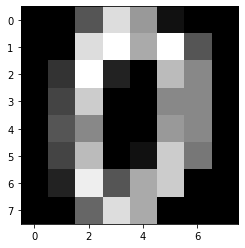

In [3]:
# 이미지 출력해보기
print("image shape : {}" .format(digits.images.shape))
print("="*50)

# images 데이터 출력해보기
print(digits.images[0])
print("="*50)

# images 값 확인해보기
print(digits.target[0])

# 이미지로 확인해보기
plt.imshow(digits.images[0], cmap=plt.cm.gray)

In [4]:
# 훈련 데이터, 레이블 데이터, 테스트 데이터 분류하기
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [5]:
# 훈련하기
logisticRegression = LogisticRegression()
logisticRegression.fit(x_train, y_train)

LogisticRegression()

In [6]:
# 테스트하기
prediction = logisticRegression.predict([x_test[5]])
print("predict result : {}, value : {}" .format(prediction, y_test[5]))

predict result : [2], value : 2


In [7]:
# 정확도 계산하기
predictions = logisticRegression.predict(x_test)
accuracy_score(y_test, predictions)

0.9666666666666667

In [8]:
# pickle 로 LogisticRegression 객체를 파일로 저장하기
f = open("minist.dat", "wb")
pickle.dump(logisticRegression, f)
f.close()

In [9]:
# 파일에 저장된 LogisticRegression 객체 불러오기
f = open("minist.dat", "rb")
logisticObj = pickle.load(f)
f.close()

result prediction : [3], value : 3
result prediction : [1], value : 1
result prediction : [1], value : 1
result prediction : [9], value : 9
result prediction : [2], value : 8
result prediction : [2], value : 2
result prediction : [8], value : 8
result prediction : [5], value : 5
result prediction : [5], value : 5
result prediction : [5], value : 9


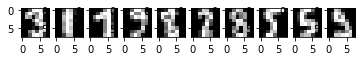

In [10]:
# 이미지 파일 불러와 테스트해보기

# x_test 이미지 10개 불러오기
for i, img in enumerate(x_test[:10]):
    img_resize = np.resize(img, (8, 8))

    plt.subplot(1, 10, i+1)
    plt.imshow(img_resize, cmap=plt.cm.gray)

    result = logisticObj.predict([img])
    print("result prediction : {}, value : {}" .format(result, y_test[i]))



result prediction : [7]
result prediction : [1]
result prediction : [7]
result prediction : [7]
result prediction : [3]
result prediction : [4]
result prediction : [3]
result prediction : [7]
result prediction : [3]
result prediction : [7]
score : 0.2


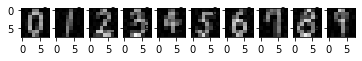

In [12]:
# 손글씨 테스트해보기

# 현재 디렉터리에서 jpg 파일 읽기
strsearch = os.getcwd() + "/mnist_*.jpg"
files = glob.glob(strsearch)

img_list = list()
for i, strfile in enumerate(files):
    img = plt.imread(strfile)

    plt.subplot(1, 10, i+1)
    plt.imshow(img, cmap=plt.cm.gray)

    img_resize = np.resize(img, (64))
    img_list.append(img_resize)
    result = logisticObj.predict([img_resize])
    print("result prediction : {}" .format(result))

# 손글씨 정답률 검사하기
y_result = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

result = logisticObj.predict(img_list)
score = accuracy_score(result, y_result)
print("score : {}" .format(score))

result prediction : [7]
result prediction : [3]
result prediction : [7]
result prediction : [3]
result prediction : [3]
result prediction : [4]
result prediction : [3]
result prediction : [7]
result prediction : [3]
result prediction : [3]


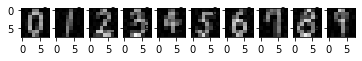

In [83]:
# LogisticRegression 옵션을 변경해 손글씨 테스트해보기
log = LogisticRegression(solver='saga', max_iter=5000)
log.fit(x_train, y_train)

# 현재 디렉터리에서 jpg 파일 읽기
strsearch = os.getcwd() + "/mnist_*.jpg"
files = glob.glob(strsearch)

for i, strfile in enumerate(files):
    img = plt.imread(strfile)

    plt.subplot(1, 10, i+1)
    plt.imshow(img, cmap=plt.cm.gray)

    img_resize = np.resize(img, (64))
    result = log.predict([img_resize])
    print("result prediction : {}" .format(result))